In [1]:
from fytok.Tokamak import Tokamak
from spdm.view import View as sp_view

2023-10-01 07:21:56,739 [   fytok]     INFO: 
#######################################################################################################################

    ______      _____     _
   / ____/_  __|_   _|__ | | __
  / /_  / / / /  | |/ _ \| |/ /
 / __/ / /_/ /   | | (_) |   <
/_/    \__, /    |_|\___/|_|\_\
      /____/      
Copyright (c) 2021-present Zhi YU (Institute of Plasma Physics Chinese Academy of Sciences) 
URL         : https://gitee.com/openfusion/fytok_tutorial

version = 0.0.0
#######################################################################################################################

2023-10-01 07:21:56,761 [   fytok]     INFO: Mapping path [PosixPath('/home/salmon/workspace/fytok/python/fytok/_mapping')]
2023-10-01 07:21:56,954 [   fytok]     INFO: FyTok (0.2.0-153-gace0bd1-dirty) is compatible with the IMAS data dictionary 3.38.1-dirty.


In [2]:
tok = Tokamak("file+geqdsk://./data/g900003.00230_ITER_15MA_eqdsk16HR.txt",
              device='ITER', shot='900003', time=2.3)

2023-10-01 07:21:57,115 [    spdm]     INFO: Load module spdm.plugins.data.plugin_xml


2023-10-01 07:21:57,468 [    spdm]     INFO: Load module fytok.plugins.equilibrium.eq_analyze
2023-10-01 07:21:57,472 [    spdm]     INFO: Load module spdm.plugins.data.plugin_geqdsk
2023-10-01 07:21:57,473 [    spdm]    DEBUG: /home/salmon/workspace/fytok_tutorial/../fytok/python/spdm/plugins/data/plugin_geqdsk.py:437:__init__: Open File mode=Mode.read  URITuple(protocol='file+geqdsk', authority='', path='./data/g900003.00230_ITER_15MA_eqdsk16HR.txt', query={'shot': '900003', 'run': '', 'uid': '900003'}, fragment='') 
2023-10-01 07:21:57,539 [   fytok]     INFO: Load module eq_analyze 
2023-10-01 07:21:57,542 [    spdm]     INFO: Load module spdm.view.view_matplotlib
2023-10-01 07:21:57,573 [    spdm]     INFO: Load module spdm.mesh.mesh_rectangular


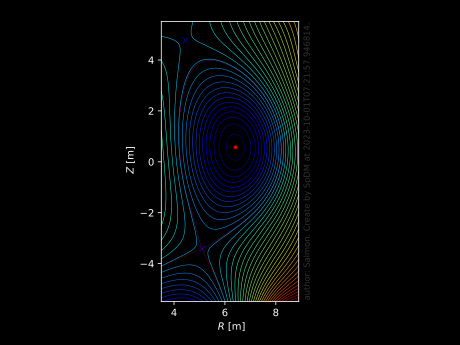

In [3]:
display(tok.equilibrium)

2023-10-01 07:21:58,064 [   fytok]     INFO: Load module Wall 


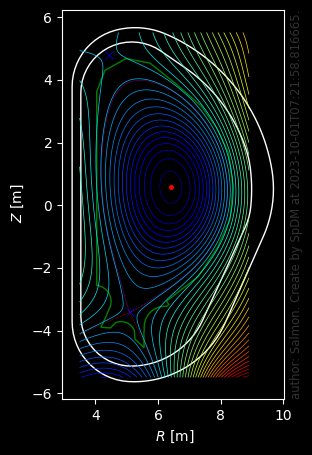

In [4]:
fig=sp_view.display([tok.equilibrium,tok.wall])

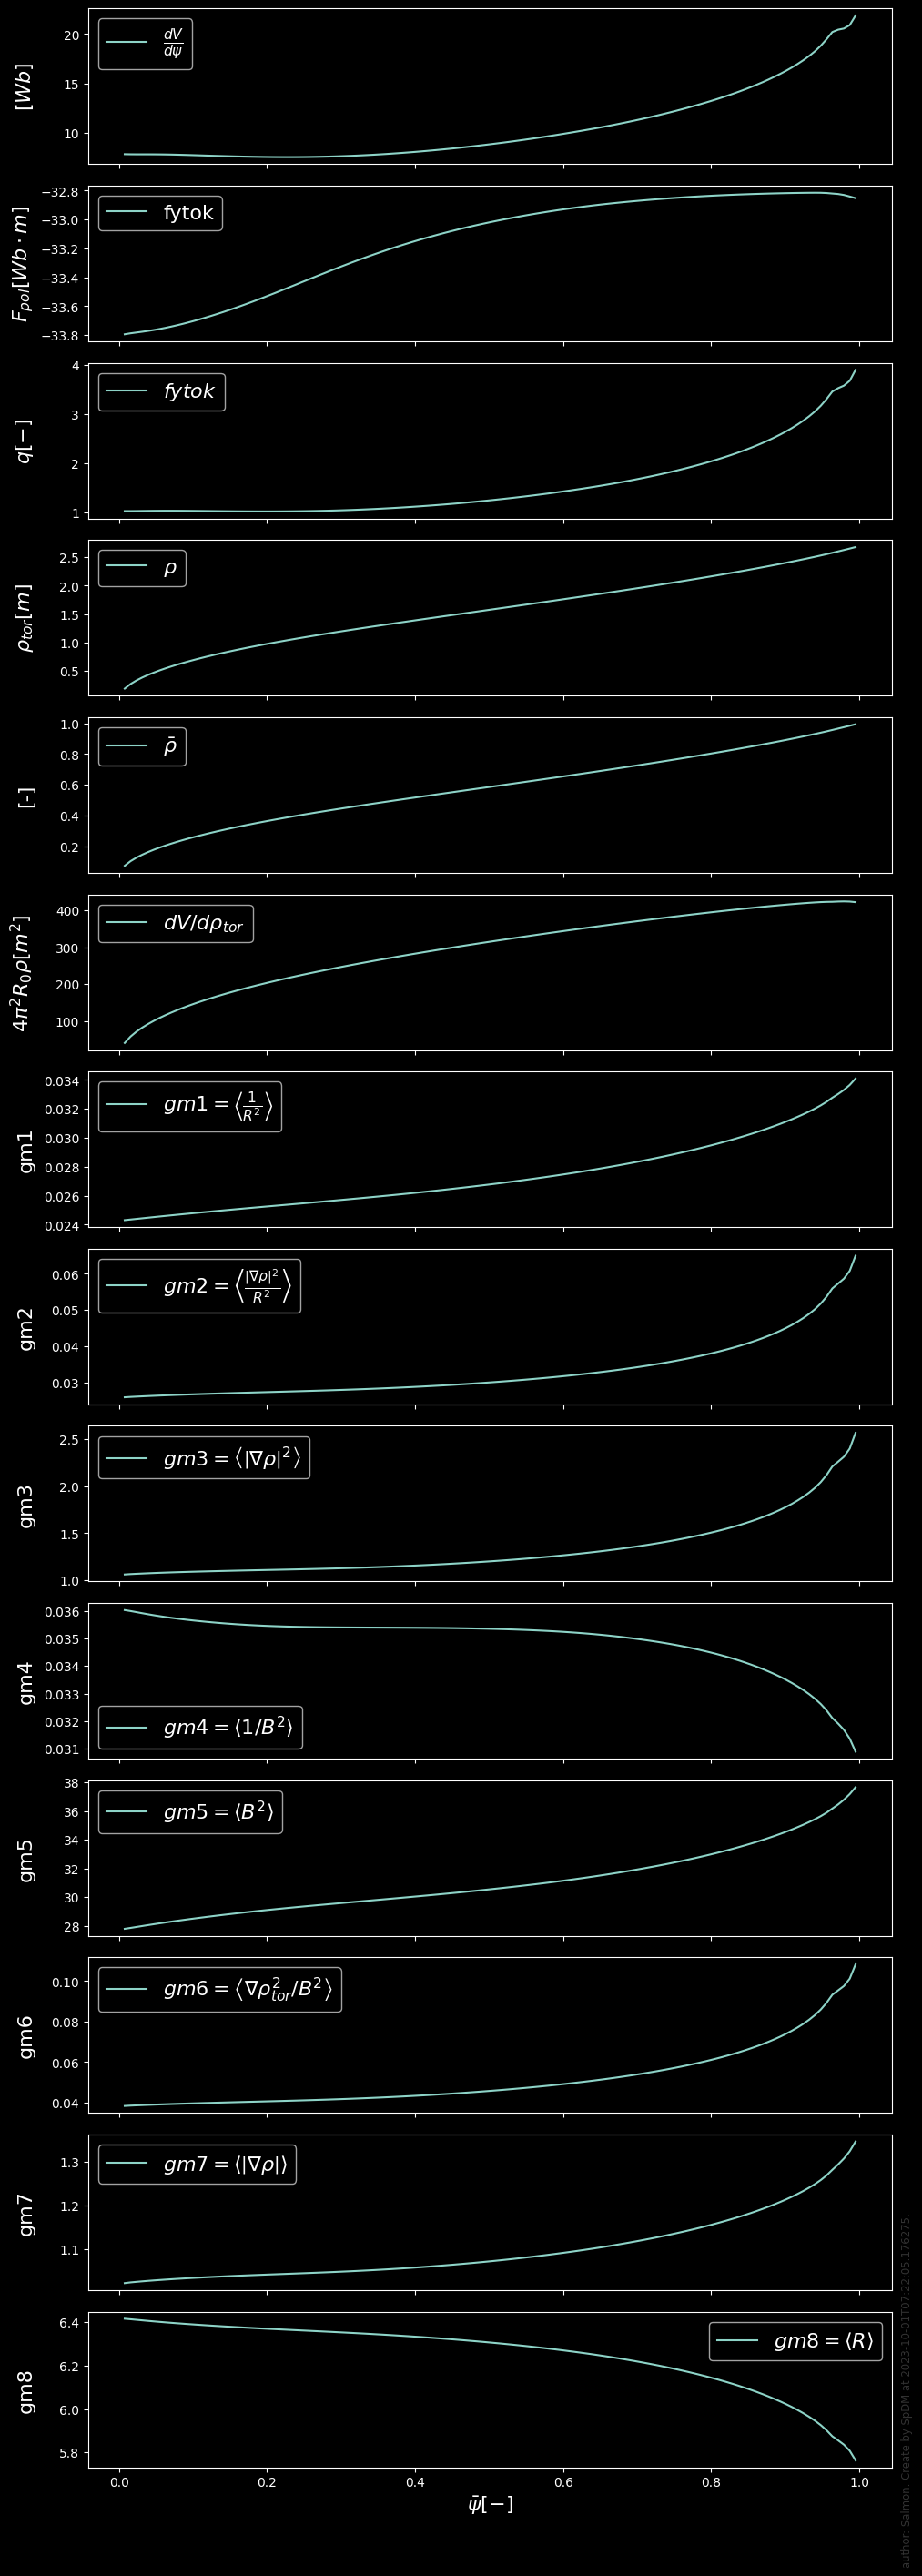

In [5]:
eq_profiles_1d = tok.equilibrium.time_slice.current.profiles_1d

profs = sp_view.plot([
    ((eq_profiles_1d.dvolume_dpsi, {"label": r"$\frac{dV}{d\psi}$"}), {"y_label": r"$[Wb]$"}),

    # (eq_profiles_1d.dpsi_drho_tor, {"label": r"$\frac{d\psi}{d\rho_{tor}}$"}),
    ([
        # (bs_eq_fpol,  {"label": "astra", **bs_line_style}),
        (eq_profiles_1d.f,  {"label": r"fytok"}),
    ], {"y_label": r"$F_{pol} [Wb\cdot m]$"}),
    ([
        # (function_like(profiles["q"].values, bs_psi), {"label": r"astra", **bs_line_style}),
        (eq_profiles_1d.q,  {"label": r"$fytok$"}),
    ], {"y_label": r"$q [-]$"}),
    ([
        # (function_like(profiles["rho"].values, bs_psi), {"label": r"astra", **bs_line_style}),
        (eq_profiles_1d.rho_tor,   {"label": r"$\rho$"}),
    ], {"y_label":  r"$\rho_{tor}[m]$", }),

    ([
        # (function_like(profiles["x"].values, bs_psi), {
        #     "label": r"$\frac{\rho_{tor}}{\rho_{tor,bdry}}$ astra", **bs_line_style}),
        (eq_profiles_1d.rho_tor_norm,   {"label": r"$\bar{\rho}$"}),
    ], {"y_label":  r"[-]", }),

    ([
        # (function_like(4*(scipy.constants.pi**2) * R0 * profiles["rho"].values, bs_psi),
        #  {"label": r"$4\pi^2 R_0 \rho$", **bs_line_style}),
        (eq_profiles_1d.dvolume_drho_tor,  {"label": r"$dV/d\rho_{tor}$", }),
    ], {"y_label":  r"$4\pi ^ 2 R_0 \rho[m ^ 2]$"}),

    (eq_profiles_1d.gm1,   {"label": r"$gm1=\left<\frac{1}{R^2}\right>$"}),
    (eq_profiles_1d.gm2,   {"label": r"$gm2=\left<\frac{\left|\nabla \rho\right|^2}{R^2}\right>$"}),
    (eq_profiles_1d.gm3,   {"label": r"$gm3=\left<\left|\nabla \rho\right|^2\right>$"}),
    (eq_profiles_1d.gm4,   {"label": r"$gm4=\left<1/B^2\right>$"}),
    (eq_profiles_1d.gm5,   {"label": r"$gm5=\left<B^2\right>$"}),
    (eq_profiles_1d.gm6,   {"label": r"$gm6=\left<\nabla \rho_{tor}^2/ B^2 \right>$"}),
    (eq_profiles_1d.gm7,   {"label": r"$gm7=\left<\left|\nabla \rho\right|\right>$"}),
    (eq_profiles_1d.gm8,   {"label": r"$gm8=\left<R\right>$"}),

],
    x_axis=tok.equilibrium.time_slice.current.profiles_1d.psi[1:],
    x_value=tok.equilibrium.time_slice.current.profiles_1d.psi_norm[1:],
    x_label=r"$\bar{\psi}[-]$",
)


In [6]:
help(tok.equilibrium)

Help on FyEqAnalyze in module fytok.plugins.equilibrium.eq_analyze object:

equilibrium = class FyEqAnalyze(fytok.modules.Equilibrium.Equilibrium)
 |  equilibrium(*args, **kwargs)
 |  
 |  Magnetic surface analyze 磁面分析工具
 |  =============================
 |  input:
 |      - vacuum_toroidal_field.b0, vacuum_toroidal_field.r0
 |      - fpol, Diamagnetic function (F=R B_Phi)
 |      - profiles_2d.psi (RZ 2D)
 |  
 |  output：
 |      - 识别 O,X point
 |      - 识别 Separatrix, boundary
 |      - Surface average
 |  
 |  Method resolution order:
 |      FyEqAnalyze
 |      fytok.modules.Equilibrium.Equilibrium
 |      fytok._imas.lastest.equilibrium._T_equilibrium
 |      fytok.utils.utilities.IDS
 |      fytok.utils.utilities.Module
 |      spdm.data.Actor.Actor
 |      spdm.data.sp_property.SpTree
 |      spdm.data.HTree.HTree
 |      typing.Generic
 |      spdm.utils.plugin.Pluggable
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, *args, **kwargs)
 |      Init

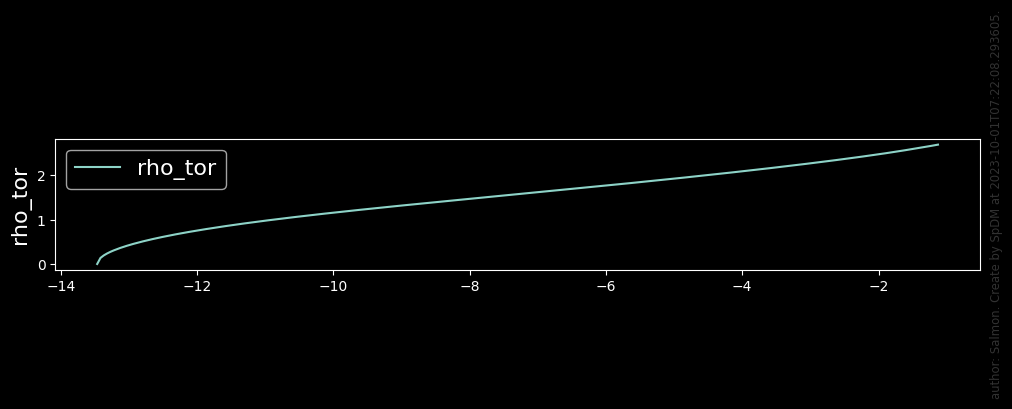

In [7]:
fig = sp_view.plot(tok.equilibrium.time_slice.current.profiles_1d.rho_tor)
